In [2]:
import pandas as pd
auto = pd.read_csv("auto.txt",delim_whitespace=True, na_values="NA")
auto['origin'] = auto['origin'].map({1: "US", 2: "Europe", 3: "Japan"}).astype("category")
auto = auto.dropna(subset=['horsepower'])
auto.head()

/var/folders/8k/q6d0vdfs4rlgwrf9mlvkdj6m0000gn/T/ipykernel_55530/2060529659.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv("auto.txt",delim_whitespace=True, na_values="NA")


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,US,ford torino


#### part (a)

In [3]:
import statsmodels.api as sm

X = sm.add_constant(auto['horsepower'])
y = auto['mpg']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 23 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        14:50:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

Regresison expression:
mpg = 39.9359 - 0.1578 * horsepower

#### part (b)
For each additional 1 horsepower, there would be 0.1578 fewer mpg on average.

#### part (d)

In [4]:
import numpy as np
y_hat = model.fittedvalues
residuals = y - y_hat
RSS = sum(residuals**2)
n = len(auto)
RSE = np.sqrt(RSS/(n-1-1))
print(f"RSE: {RSE}")

RSE: 4.90575691954594


RSE = 4.9. This means the typical deviation of actual mpg from the fitted regression line is about ±4.9 mpg.

#### part (e)
Yes. The p-value for horsepower < 0.0001, so horsepower is a significant predictor of mpg.

#### part (f)
R^2 = 0.606, which means 60.6% of the variation in mpg is explained by horsepower.

#### part(g)

In [5]:
mpg = 39.9359 - 0.1578 * 98
print(f"Predicted mpg for 98 horsepower: {mpg}")

Predicted mpg for 98 horsepower: 24.4715


#### part(h)
Question: What mpg do we expect for one random car with 98 HP?

In [6]:
new_X = pd.DataFrame({"const": [1], "horsepower": [98]})
pred = model.get_prediction(new_X)
pred_summary = pred.summary_frame(alpha=0.05) 
print(pred_summary)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


prediction interval: [14.809396, 34.124758]

#### part (i)

In [7]:
pred_summary_1 = pred.summary_frame(alpha=0.01) 
print(pred_summary_1)

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.816686      25.117468     11.751909   

   obs_ci_upper  
0     37.182245  


Confidence interval: [23.816686, 25.117468]
What is the average mpg of ALL cars with 98 HP?

### part (j)

In [ ]:
from scipy import stats

slope = model.params['horsepower']
se_slope = model.bse['horsepower']


df = model.df_resid 
t_crit = stats.t.ppf(1 - 0.05, df)

lower = slope - t_crit * se_slope
upper = slope + t_crit * se_slope
(lower, upper)

(-0.16847188176568642, -0.14721758494162082)

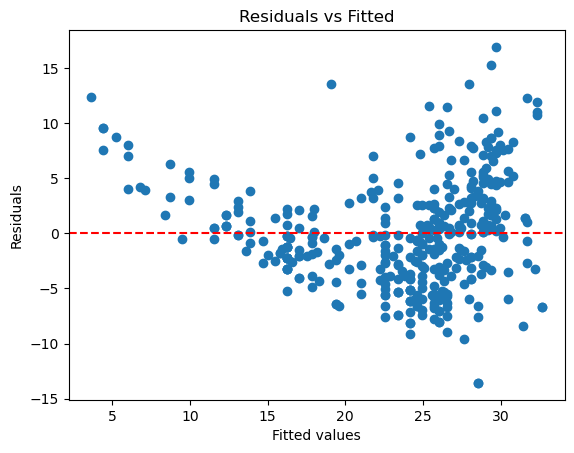

In [13]:
#### part(k)
import matplotlib.pyplot as plt
import statsmodels.api as sm

residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

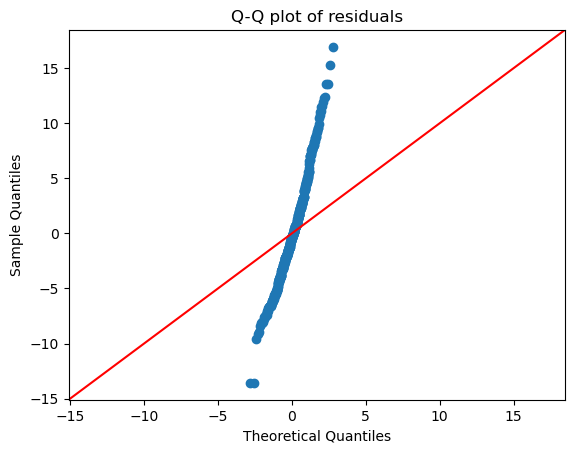

In [ ]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q plot of residuals')
plt.show()

The residual vs. fitted plot shows a random scatter of points around the horizontal red line. However, the spread of the residuals is not uniform and variance of the residuals isn't constant across all levels of the fitted values. So the homoscedasticity assumption is not met.

The points in the QQ plot do not follow the diagonal line perfectly. The tails of the distribution (both the upper and lower ends) deviate significantly from the line. This suggests that the residuals are not normally distributed, which also violated the assumption of the model